In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.datasets import load_boston
data = load_boston()

In [8]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [27]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Correlation method

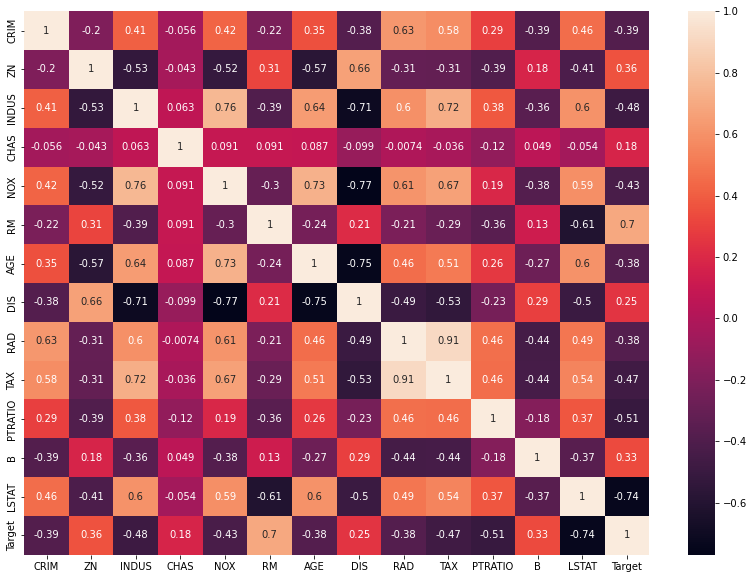

In [28]:
corrMat = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corrMat, annot=True);

- Observations: 
    1. Acces to Road and Tax collection showing Positive 91% correleation.
    

## Varience Thrust hold

In [29]:
from sklearn.feature_selection import VarianceThreshold
# Threshold = p*(1-p)
varThres = VarianceThreshold(threshold = 0.16) #80%
varThres.fit(df)

VarianceThreshold(threshold=0.16)

In [30]:
varTh_df = pd.DataFrame({"Name of Features": df.columns ,"Feature TO select":varThres.get_support()})
varTh_df

,Name of Features,Feature TO select
0,CRIM,True
1,ZN,True
2,INDUS,True
3,CHAS,False
4,NOX,False
5,RM,True
6,AGE,True
7,DIS,True
8,RAD,True
9,TAX,True


In [31]:
df.drop(varTh_df[varTh_df["Feature TO select"]==False]["Name of Features"], axis = 1)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Chisquar and Annova F Test

In [40]:
data_iris = load_iris()

In [54]:
iris_df = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
iris_df["Target"] = data_iris.target #[0 ='setosa', 1 = 'versicolor', 2 = 'virginica']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [55]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [56]:
iris_df = iris_df.astype(int)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sepal length (cm)  150 non-null    int32
 1   sepal width (cm)   150 non-null    int32
 2   petal length (cm)  150 non-null    int32
 3   petal width (cm)   150 non-null    int32
 4   Target             150 non-null    int32
dtypes: int32(5)
memory usage: 3.1 KB


In [58]:
#Saperating dataset into X and y
X = iris_df.drop("Target", axis = 1)
y = iris_df.Target

In [38]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif
import numpy as np

In [60]:
chisqr_selector =  SelectPercentile(chi2)
kBest = chisqr_selector.fit_transform(X,y)

chi_score = pd.DataFrame(list(zip(X.columns, chisqr_selector.scores_)), columns=["Feature", "Kbest_score"])
chi_score

,Feature,Kbest_score
0,sepal length (cm),10.287129
1,sepal width (cm),5.022670
2,petal length (cm),133.068548
3,petal width (cm),74.279070


- Observations:
    1. Petal Length and Petal width play important role in determining flower type

In [66]:
# using Kbest
chisqr_selector =  SelectKBest(chi2, k=2)
kBest = chisqr_selector.fit_transform(X,y)

chi_score2 = pd.DataFrame(list(zip(X.columns, chisqr_selector.scores_)), columns=["Feature", "Kbest_score"])
chi_score2

,Feature,Kbest_score
0,sepal length (cm),10.287129
1,sepal width (cm),5.022670
2,petal length (cm),133.068548
3,petal width (cm),74.279070


In [68]:
kBest.shape # gives 2 best parameters

(150, 2)

## Using Information Gain

In [70]:
from sklearn.feature_selection import mutual_info_classif

In [71]:
mutual_info_classif(X,y)

array([0.46980156, 0.10097392, 0.9347962 , 0.80013387])

- Showing same information petal width and petal length are main deciding factors.